### Introduction

For this project I have chosen to analize TMDb movie data. 

Questions:

1. Do the movies released after 2010 have a better vote average?
2. In which year released movies are the most popular?
3. Long movies (more than 120 minutes) are more popular?
4. Which movie every year made the highest revenue?
5. How many movies was published each year?

### Data Wrangling 

In [3]:
import pandas as pd

data1 = pd.read_csv('tmdb-movies.csv')

In [4]:
data1.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
data1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There we can see that some columns have missing data. I left them empty.

In [7]:
sum(data1.duplicated())

1

In [8]:
data1.drop_duplicates(inplace=True)

In [9]:
sum(data1.duplicated())

0

In the data set was one duplicate row, this row was deleted from the data set. 

In [10]:
data1['release_date'] = pd.to_datetime(data1['release_date'])

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

Also release date has a wrong data type, so it was changed.

Now we will remove | from some columns:

In [12]:
data1['genres'] = data1['genres'].str.replace(('\?|\|'), ', ',regex=True)

In [13]:
data1['production_companies'] = data1['production_companies'].str.replace(('\?|\|'), ', ',regex=True)

In [14]:
data1['cast'] = data1['cast'].str.replace(('\?|\|'), ', ',regex=True)

In [15]:
data1.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"Action, Adventure, Science Fiction, Thriller","Universal Studios, Amblin Entertainment, Legen...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,"Action, Adventure, Science Fiction, Thriller","Village Roadshow Pictures, Kennedy Miller Prod...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"Shailene Woodley, Theo James, Kate Winslet, An...",http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,"Adventure, Science Fiction, Thriller","Summit Entertainment, Mandeville Films, Red Wa...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,"Action, Adventure, Science Fiction, Fantasy","Lucasfilm, Truenorth Productions, Bad Robot",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,"Vin Diesel, Paul Walker, Jason Statham, Michel...",http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,"Action, Crime, Thriller","Universal Pictures, Original Film, Media Right...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data analysis

In [16]:
import numpy as np

In [17]:
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


1. Movies released after 2010 have a better vote average?

In [18]:
data_a = data1[data1['release_year'] > 2010]
data_b = data1[data1['release_year'] < 2010]

In [19]:
mean_a=np.mean(data_a['vote_average'])

In [20]:
mean_b=np.mean(data_b['vote_average'])

In [21]:
def visualize_bar(height1, height2, label1, label2):
    locations = [1, 2]
    heights = [height1, height2]
    labels = [label1,label2]
    return plt.bar(locations, heights, tick_label=labels)

Text(0, 0.5, 'Vote average')

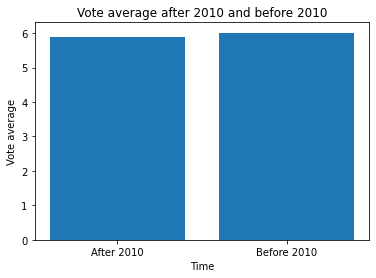

In [23]:
visualize_bar(height1 = mean_a, height2 = mean_b, label1 = "After 2010", label2 = "Before 2010")
plt.title('Vote average after 2010 and before 2010')
plt.xlabel('Time')
plt.ylabel('Vote average')

We can notice, that movies released after 2010 has similar vote average as movies released before 2010, but movies released before 2010 has slightly higher vote average.

2. In which year released movies are the most popular?

In [95]:
years=data1.groupby('release_year')['popularity'].mean()
years

release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
1965    0.342587
1966    0.304112
1967    0.471154
1968    0.484202
1969    0.422778
1970    0.341700
1971    0.448112
1972    0.449054
1973    0.494462
1974    0.447829
1975    0.519445
1976    0.474516
1977    0.626387
1978    0.413314
1979    0.589312
1980    0.495652
1981    0.442413
1982    0.543353
1983    0.541445
1984    0.590843
1985    0.584058
1986    0.509545
1987    0.504637
1988    0.465039
1989    0.563658
1990    0.535735
1991    0.501090
1992    0.582913
1993    0.547056
1994    0.668825
1995    0.710722
1996    0.604768
1997    0.712003
1998    0.626165
1999    0.645799
2000    0.546799
2001    0.702658
2002    0.701454
2003    0.719083
2004    0.722438
2005    0.628663
2006    0.606371
2007    0.593161
2008    0.584817
2009    0.600178
2010    0.645058
2011    0.675069
2012    0.607197
2013    0.627627
2014    0.887268
2015    1.030657
Name: popularity, dtype: float64

In [96]:
years.idxmax()

2015

In 1973 year released movies has the best vote average. 

3. Long movies (more than 120 minutes) are more popular?

In [25]:
data_a2 = data1[data1['runtime'] > 120]
data_b2 = data1[data1['runtime'] < 120]

In [26]:
mean_a2=np.mean(data_a2['popularity'])

In [27]:
mean_b2=np.mean(data_b2['popularity'])

Text(0, 0.5, 'Popularity')

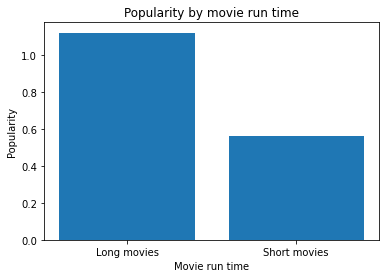

In [29]:
visualize_bar(height1 = mean_a2, height2 = mean_b2, label1 = 'Long movies', label2 = 'Short movies')
plt.title('Popularity by movie run time')
plt.xlabel('Movie run time')
plt.ylabel('Popularity')

From the table we can identify, that long movies are much more popular than shorter movies.

4. Which movie every year made the highest revenue? 

In [133]:
idx = data1.groupby(['release_year'])['revenue'].transform(max) == data1['revenue']

In [146]:
idx_data = data1[idx]
idx_data[['release_year', 'original_title', 'revenue', 'genres']].sort_values(by=['revenue'])

,release_year,original_title,revenue,genres
10822,1966,Who's Afraid of Virginia Woolf?,33736689,Drama
9719,1968,2001: A Space Odyssey,56715371,"Science Fiction, Mystery, Adventure"
10143,1960,Spartacus,60000000,"Action, Drama, History"
9850,1962,Lawrence of Arabia,70000000,"Adventure, Drama, History, War"
10438,1963,From Russia With Love,78898765,"Action, Thriller, Adventure"
10725,1969,Butch Cassidy and the Sundance Kid,102308889,"History, Drama, Western, Crime"
9925,1971,Diamonds Are Forever,116000000,"Adventure, Action, Thriller, Science Fiction"
9767,1974,Blazing Saddles,119500000,"Comedy, Western"
9881,1964,Goldfinger,124900000,"Adventure, Action, Thriller"
10654,1970,Love Story,136400000,"Drama, Romance"


The highest revenue has the movie "Avatar".

5. How many movies was published each year?

In [30]:
movies_per_year=data1.groupby('release_year')['original_title'].count()
movies_per_year

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: original_title, dtype: int64

In [34]:
df = pd.DataFrame(movies_per_year)

Text(0, 0.5, 'Count')

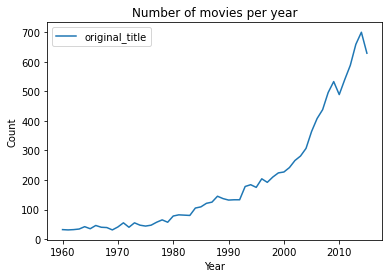

In [46]:
df.plot(stacked=True)
plt.title('Number of movies per year')
plt.xlabel('Year')
plt.ylabel('Count')

### Conclusions

There is a lot of missing data in the data set, for example, only 2936 movies have a home page, or more than 2000 movies don't have taglines. I determined that films released before 2010 have a better vote rating, however, the most popular movies were released in 2015. As well long movies are more popular. From this data set, the highest revenue has the "Avatar" movie. And from the last plot, we can notice that the number of released movies is more significant almost every year. 